In [1]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [191]:
# import required libraries
import pandas as pd
import seaborn as sb

In [192]:
# Read the data from the CSV file using Pandas
train_df = pd.read_csv("train.csv")
train_df.columns = train_df.columns.str.strip()

In [4]:
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/tmp/ipython-input-1462896600.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x="label", data=train_df, palette=colors)


<Axes: xlabel='label', ylabel='count'>

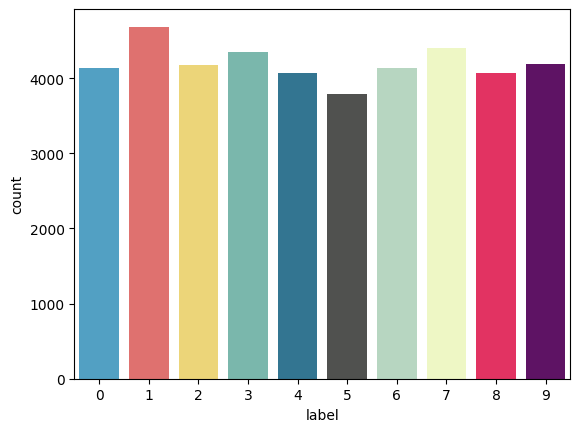

In [5]:
# Get the label counts from the DataFrame
labels = train_df['label']
label_counts = labels.value_counts().sort_index()


colors = ['#3FA7D6', '#F25F5C', '#FFE066', '#70C1B3', '#247BA0',
 '#50514F', '#B2DBBF', '#F3FFBD', '#FF1654', '#6A0572']
sb.countplot(x="label", data=train_df, palette=colors)


In [110]:
import matplotlib.pyplot as plt

def image_show(df, row_number, visualize=False, test_df=False):
    '''
        Parameters:
            df --> Pandas dataframe type
            row_number --> row index (For example: 0, 1, 2, 3, etc.)
            visualize --> If True then displays the raw data into 28 by 28 pixels image.
                          If False then returns '28 by 28 pixels reshaped image data' and 'corresponding label'
    '''

    ax = None
    if test_df == False:
      single_data = df.iloc[row_number]
      single_data_label = single_data['label']
      single_data_pixel = single_data.drop('label').values.reshape(28,28)
      if visualize:
        if ax is None:
            fig, ax = plt.subplots(1, 1, figsize=(3, 3))
        ax = sb.heatmap(single_data_pixel, cmap="gray", cbar=False, square=True)
        ax.set_title(f"Label: {single_data_label}")
        ax.axis('off')
      else:
        return single_data_pixel, single_data_label
    else:
      single_data = df.iloc[row_number].values.reshape(28, 28)
      if visualize:
        if ax is None:
            fig, ax = plt.subplots(1, 1, figsize=(3, 3))
        ax = sb.heatmap(single_data, cmap="gray", cbar=False, square=True)
        # ax.set_title(f"Label: {single_data_label}")
        ax.axis('off')


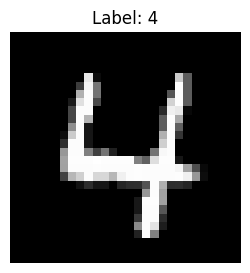

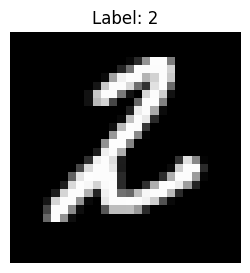

In [57]:
image_show(train_df, 42, visualize=True)
image_show(train_df, 4242, visualize=True)

plt.show()

In [8]:
def dataframe_formatter(df, isTest=False):
    """
    Formats a DataFrame containing image data for use in a machine learning model.

    :param df: The DataFrame containing image data.
    :param isTest: A boolean indicating whether the DataFrame is for testing data.
    :return: A tuple containing X (image data) and y (labels).
    """
    l = len(df)

    if isTest:
        data_pixel = df.values.reshape(l, 28, 28)
        return (data_pixel)

    data_label = df['label'].values.reshape(l, 1)
    data_pixel = df.drop('label', axis=1).values.reshape(l, 28,28)

    return (data_pixel, data_label)

In [9]:
X_train, y_train = dataframe_formatter(train_df, isTest=False)

In [10]:
# Split the data into a train and validation set
l = len(X_train)
train_size = int(0.8 * l)
X_train, X_val, y_train, y_val = X_train[0:train_size], X_train[train_size:], y_train[0:train_size], y_train[train_size:]

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(33600, 28, 28) (8400, 28, 28) (33600, 1) (8400, 1)


In [162]:
# # Create a CNN with Keras from TensorFlow
# # Your inputs should have the same size as your images (same as in the reshape function above)

# model = models.Sequential(  # Create the model with layers sequentially
#     [
#         ...,  # 2D convolutional layer with 20 filters, each 3x3, using ReLU activation, input shape is 28x28x1 (image dimensions)
#         ...,  # Max-pooling layer with a 2x2 window to reduce image size
#         ...,  # 2D convolutional layer with 32 filters, each 3x3, using ReLU activation
#         ...,  # Max-pooling layer with a 2x2 window
#         ...,  # 2D convolutional layer with 32 filters, each 2x2, using ReLU activation
#         ...,  # Max-pooling layer with a 2x2 window
#         ...,  # Flatten layer to convert the 2D output to 1D
#         ...,  # Fully connected layer with 200 neurons and ReLU activation
#         ...,  # Dropout layer with a dropout rate of 0.2 for regularization to prevent overfitting
#         ...  # Fully connected layer with 10 output units (classes) and sigmoid activation
#     ]
# )
# model.summary()  # Summary of the model to verify its structure



import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader


class CNN(nn.Module):
    def __init__(self):
      super(CNN, self).__init__()
      self.conv1 = nn.Conv2d(1, 20, (3,3))
      self.conv2 = nn.Conv2d(20, 32, (3,3))
      self.conv3 = nn.Conv2d(32, 32, (2,2))

      self.dropout = nn.Dropout(0.2)

      self.fc1 = nn.Linear(32 * 2 * 2, 200)
      self.fc2 = nn.Linear(200, 10)


    def forward(self, x):
      x = self.conv1(x)
      x = F.relu(x)
      x = F.max_pool2d(x, (2,2))
      x = self.conv2(x)
      x = F.relu(x)
      x = F.max_pool2d(x, (2,2))
      x = self.conv3(x)
      x = F.relu(x)
      x = F.max_pool2d(x, (2,2))

      x = torch.flatten(x, 1)
      x = self.fc1(x)
      x = F.relu(x)
      x = self.dropout(x)
      x = self.fc2(x)
      return x


def train(model, train_loader, optimizer):
    loss_epoch = 0
    model.train()
    for batch_idx, (img, label) in enumerate(train_loader):
      optimizer.zero_grad()
      output = model(img)

      loss = F.cross_entropy(output, label.squeeze())
      loss_epoch += loss.item()
      loss.backward()
      optimizer.step()

    loss_epoch /= len(train_loader)
    print(f"[Epoch]: {epoch}   [Train Loss]: {loss_epoch}", end="  ")
    return loss_epoch


def val(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for img, label in test_loader:
            output = model(img)
            test_loss += F.cross_entropy(output, label.squeeze())
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(label.view_as(pred)).sum().item()

    test_loss /= len(test_loader)
    print('[Test Loss]: {:.4f}   [Accuracy]: {}/{} ({:.0f}%)'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


def load_datas(X_train, X_val, y_train, y_val):
  X_train_tensor = torch.tensor(X_train).unsqueeze(1).float()
  X_val_tensor = torch.tensor(X_val).unsqueeze(1).float()
  y_train_tensor = torch.tensor(y_train).long()
  y_val_tensor = torch.tensor(y_val).long()

  train_tensor = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
  test_tensor = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)

  train_loader = DataLoader(train_tensor, batch_size=64, shuffle=True)
  test_loader = DataLoader(test_tensor, batch_size=64, shuffle=True)

  return train_loader, test_loader

In [199]:
# Compile the model
# We specify the optimizer 'adam', which is a popular and efficient stochastic optimizer for neural networks.
# We use the loss function 'sparse_categorical_crossentropy', commonly used for multi-class classification with discrete labels.
# We also specify that we want to track the 'accuracy' metric during training.

# model.compile(...)

model = CNN()
train_loader, test_loader = load_datas(X_train, X_val, y_train, y_val)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [151]:
# Early stopping in case of 3 consecutive bad epochs (if we're not learning effectively and there's a risk of overfitting)
# stop_training = ...

In [200]:
# Train the model with 20 epochs
# model.fit(...)
loss_epoch = None
counter = 0
for epoch in range(20):
  new_loss_epoch = train(model, train_loader, optimizer)
  if loss_epoch is not None and abs(new_loss_epoch - loss_epoch) < 0.005:
    counter += 1
  val(model, test_loader)
  if counter >= 3:
    print("Early stopped.")
    break
  loss_epoch = new_loss_epoch

[Epoch]: 0   [Train Loss]: 0.912225313271795  [Test Loss]: 0.2200   [Accuracy]: 7835/8400 (93%)
[Epoch]: 1   [Train Loss]: 0.23179870588438853  [Test Loss]: 0.1371   [Accuracy]: 8040/8400 (96%)
[Epoch]: 2   [Train Loss]: 0.1532871961558149  [Test Loss]: 0.1024   [Accuracy]: 8109/8400 (97%)
[Epoch]: 3   [Train Loss]: 0.11767305050577437  [Test Loss]: 0.0870   [Accuracy]: 8165/8400 (97%)
[Epoch]: 4   [Train Loss]: 0.09747716729484854  [Test Loss]: 0.0731   [Accuracy]: 8208/8400 (98%)
[Epoch]: 5   [Train Loss]: 0.08316945833287069  [Test Loss]: 0.0688   [Accuracy]: 8213/8400 (98%)
[Epoch]: 6   [Train Loss]: 0.0716769602690779  [Test Loss]: 0.0675   [Accuracy]: 8216/8400 (98%)
[Epoch]: 7   [Train Loss]: 0.061934271701389834  [Test Loss]: 0.0566   [Accuracy]: 8246/8400 (98%)
[Epoch]: 8   [Train Loss]: 0.056576052227811445  [Test Loss]: 0.0541   [Accuracy]: 8248/8400 (98%)


KeyboardInterrupt: 

In [194]:
# Read the data from the CSV file using Pandas
test_df = pd.read_csv("test.csv", index_col=False)

In [187]:
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [195]:
X_test = dataframe_formatter(test_df, isTest=True)

X_test_tensor = torch.tensor(X_test).unsqueeze(1).float()
new_test_dataset = torch.utils.data.TensorDataset(X_test_tensor)
new_test_loader = DataLoader(new_test_dataset, shuffle=False)

In [197]:
import numpy as np

def test(model, test_loader):
    prediction = []

    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for (img,) in test_loader:
            output = model(img)
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            prediction.append(pred.numpy())

    return np.array([p.item() for p in prediction]).reshape(-1, 1)

predictions = test(model, new_test_loader)

[4]
[2]
[9]
[0]


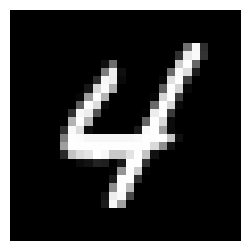

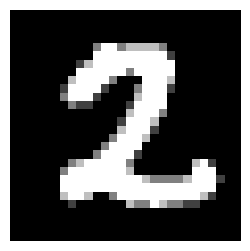

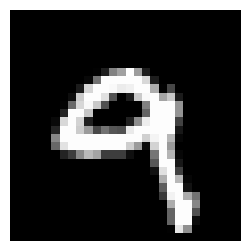

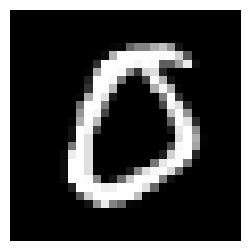

In [202]:
image_show(test_df, 42, visualize=True, test_df=True)
print(predictions[42])
image_show(test_df, 4242, visualize=True, test_df=True)
print(predictions[4242])
image_show(test_df, 288, visualize=True, test_df=True)
print(predictions[288])
image_show(test_df, 68, visualize=True, test_df=True)
print(predictions[68])

plt.show()